In [1]:
import pandas as pd
import re

In [7]:
df=pd.read_csv('C:/Users/Abhishek Mukherjee/Downloads/ebola_2014_2016_clean.csv')
df1=pd.read_csv('C:/Users/Abhishek Mukherjee/Downloads/ebola_data_db_format.csv')

In [8]:
df.head()

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0


In [6]:
df['Country'].unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

In [90]:
#Average number of suspected cases:
#Grouped by country
temp=df['Cumulative no. of confirmed, probable and suspected cases'].groupby(df['Country']).mean()
round(temp)

Country
Guinea                       3298.0
Italy                           1.0
Liberia                      6737.0
Mali                            8.0
Nigeria                        20.0
Senegal                         1.0
Sierra Leone                11596.0
Spain                           1.0
United Kingdom                  1.0
United States of America        4.0
Name: Cumulative no. of confirmed, probable and suspected cases, dtype: float64

In [91]:
#Average number of suspected deaths:
#Grouped by country
temp=df['Cumulative no. of confirmed, probable and suspected deaths'].groupby(df['Country']).mean()
round(temp)

Country
Guinea                      2174.0
Italy                          0.0
Liberia                     3013.0
Mali                           6.0
Nigeria                        8.0
Senegal                        0.0
Sierra Leone                3432.0
Spain                          0.0
United Kingdom                 0.0
United States of America       1.0
Name: Cumulative no. of confirmed, probable and suspected deaths, dtype: float64

In [92]:
#Separating the dates: 
def DateFormatter(tempDates):
    
    temp=re.split('-',tempDates)
    tempPrime='/'.join(temp[:2])
    tempPrime=tempPrime[2:]
    
    return tempPrime
    

In [95]:
def findingNumCases(tempCountry):
    tempDates=[]
    tempSuspCases=[]
    tempSuspDeaths=[]

    for i in range(len(df['Country'])):
    
        if df['Country'][i]==tempCountry:
        
            tempReturn=DateFormatter(df['Date'][i])
            tempDates.append(tempReturn)
            tempSuspCases.append(df['Cumulative no. of confirmed, probable and suspected cases'][i])
            tempSuspDeaths.append(df['Cumulative no. of confirmed, probable and suspected deaths'][i])
            
            
    return tempDates,tempSuspCases,tempSuspDeaths
        

In [98]:
def forPlotting(tempCountry,tempSuspCases,tempSuspDeaths):
    
    import matplotlib.pyplot as plt

    #Suspected cases:
    plt.plot(tempDates,tempSuspCases)
    plt.tick_params(axis='x', rotation=70)
    plt.xlabel('Dates(YY/MM)')
    plt.ylabel('Num. of Cases')
    plt.title(f'Variation of number of suspected cases over time for {tempCountry}')
    plt.show()


    #Suspected cases:
    plt.plot(tempDates,tempSuspDeaths)
    plt.tick_params(axis='x', rotation=70)
    plt.xlabel('Dates(YY/MM)')
    plt.ylabel('Num. of Cases')
    plt.title(f'Variation of number of suspected death cases over time for {tempCountry}')
    plt.show()


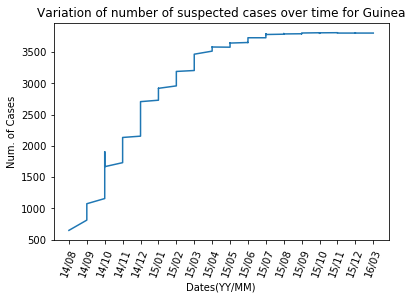

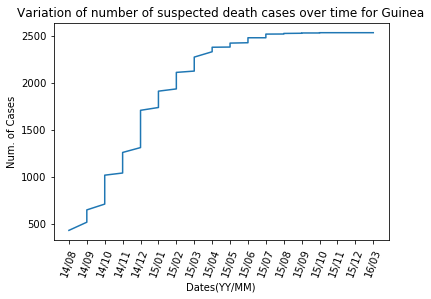

In [111]:
tempDates,tempSuspCases,tempSuspDeaths=findingNumCases('Guinea')
forPlotting('Guinea',tempSuspCases,tempSuspDeaths)

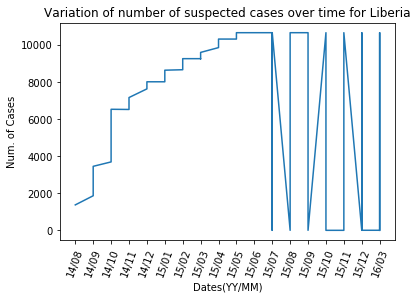

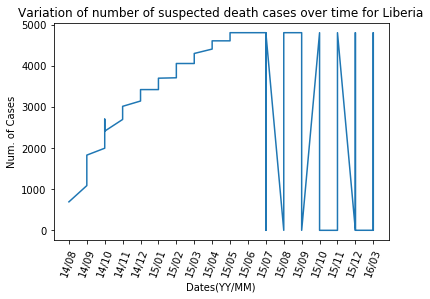

In [113]:
tempDates,tempSuspCases,tempSuspDeaths=findingNumCases('Liberia')
forPlotting('Liberia',tempSuspCases,tempSuspDeaths)

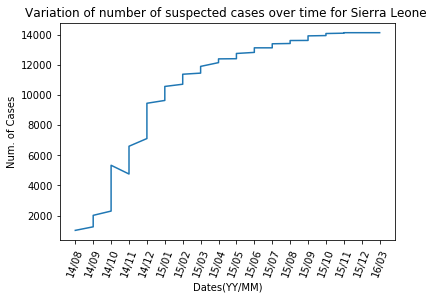

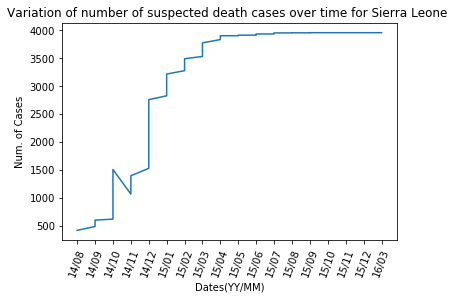

In [114]:
tempDates,tempSuspCases,tempSuspDeaths=findingNumCases('Sierra Leone')
forPlotting('Sierra Leone ',tempSuspCases,tempSuspDeaths)

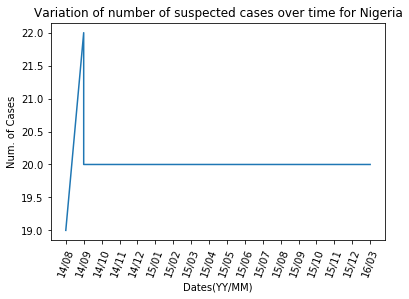

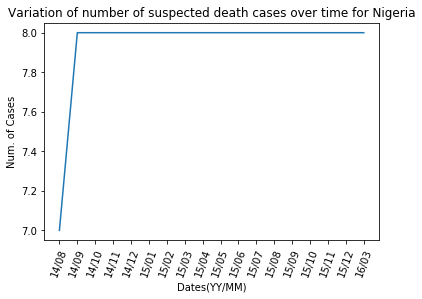

In [115]:
tempDates,tempSuspCases,tempSuspDeaths=findingNumCases('Nigeria')
forPlotting('Nigeria',tempSuspCases,tempSuspDeaths)

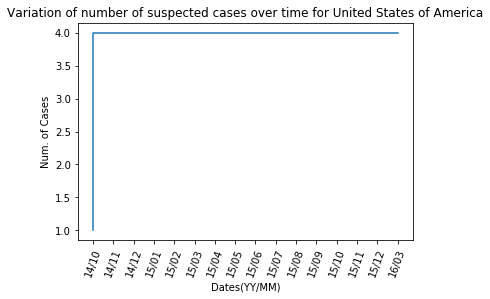

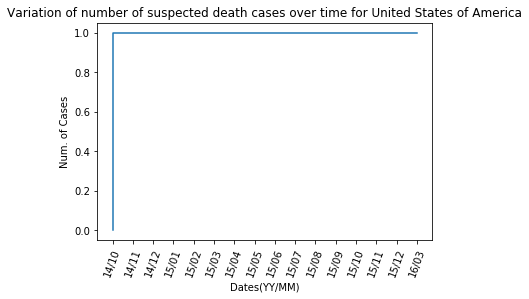

In [116]:
tempDates,tempSuspCases,tempSuspDeaths=findingNumCases('United States of America')
forPlotting('United States of America',tempSuspCases,tempSuspDeaths)